In [1]:
import joblib
import numpy as np

In [2]:
file_path = 'variables_ckks.pkl'

data = joblib.load(file_path)

weights_unenc_ckks, bias_unenc_ckks, accuracy_ckks, y_pred_unenc_ckks, cpu_seconds_ckks, cpu_usages_ckks, ram_usages_ckks, train_time_ckks, testing_time_ckks = data

In [3]:
file_path = 'variables_sklearn.pkl'

data = joblib.load(file_path)

weights_unenc_sklearn, bias_unenc_sklearn, accuracy_sklearn, y_pred_unenc_sklearn, cpu_seconds_sklearn, cpu_usages_sklearn, ram_usages_sklearn, train_time_sklearn, testing_time_sklearn = data

In [4]:
file_path = 'variables_paillier.pkl'

data = joblib.load(file_path)

weights_unenc_paillier, bias_unenc_paillier, accuracy_paillier, y_pred_unenc_paillier, cpu_seconds_paillier, cpu_usages_paillier, ram_usages_paillier, train_time_paillier, testing_time_paillier = data

In [5]:
from scipy.stats import spearmanr
correlation, p_value = spearmanr(weights_unenc_sklearn, weights_unenc_ckks)

# Print the results
print(f"Spearman rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman rank correlation coefficient: 0.9977413890457371
P-value: 6.175870633635511e-25


In [6]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(weights_unenc_sklearn, weights_unenc_ckks)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 5.705935361621287e-05


In [7]:
correlation, p_value = spearmanr(weights_unenc_sklearn, weights_unenc_paillier)

# Print the results
print(f"Spearman rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman rank correlation coefficient: 0.9977413890457371
P-value: 6.175870633635511e-25


In [8]:
mse = mean_squared_error(weights_unenc_sklearn, weights_unenc_paillier)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 5.701060321542274e-05


In [9]:
weights_unenc_sklearn

array([ 0.03253095,  0.21638141, -0.00610429,  0.15788133, -0.0794654 ,
        0.00609402, -0.0121205 ,  0.02369145,  0.32985124,  0.12158686,
        0.18370393,  0.22067433,  0.11646944,  0.08016066,  0.15285911,
        0.10570289,  0.14813307, -0.05489895, -0.0641994 , -0.20836226,
       -0.30263027, -0.10099907])

In [10]:
weights_unenc_paillier

[0.02589615728685477,
 0.21172909475824436,
 -0.017379567989872214,
 0.16400278034703905,
 -0.08766794278369396,
 0.012857855984097524,
 -0.012851884226373804,
 0.022289555998053885,
 0.32788212125425215,
 0.11049328214792059,
 0.18058458087945206,
 0.2190089097283992,
 0.1290961581280139,
 0.07683125425638401,
 0.14291693715183718,
 0.10984230736828175,
 0.14121898542454145,
 -0.05981733829465357,
 -0.07165020191123991,
 -0.20532240838175023,
 -0.3160641901914758,
 -0.0881435903558586]

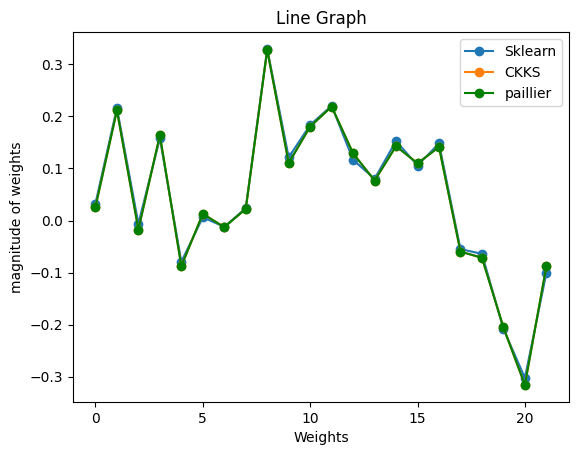

In [11]:
import matplotlib.pyplot as plt

plt.plot(weights_unenc_sklearn, label='Sklearn', marker='o')  
plt.plot(weights_unenc_ckks, label='CKKS', marker='o')  
plt.plot(weights_unenc_paillier, label='paillier', marker='o', color='green')  

plt.xlabel('Weights')
plt.ylabel('magnitude of weights')
plt.title('Line Graph')

plt.legend()

plt.show()

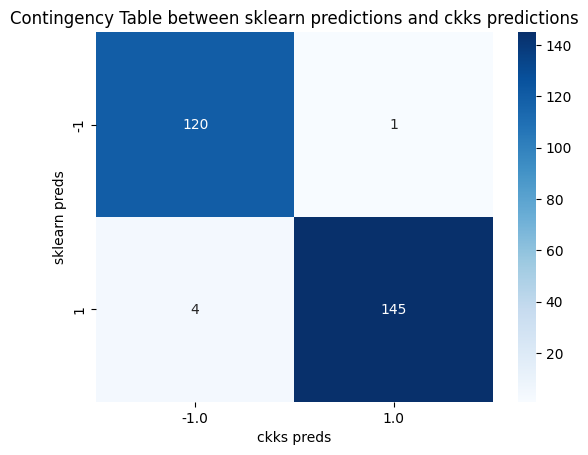

In [12]:
import seaborn as sns
import pandas as pd
data = {'sklearn_preds': y_pred_unenc_sklearn, 'ckks_preds': y_pred_unenc_ckks}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['sklearn_preds'], df['ckks_preds'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')

plt.xlabel('ckks preds')
plt.ylabel('sklearn preds')
plt.title('Contingency Table between sklearn predictions and ckks predictions')

plt.show()

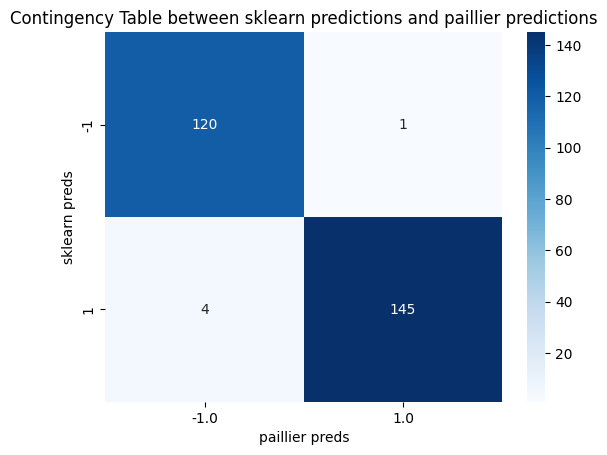

In [13]:

data = {'sklearn_preds': y_pred_unenc_sklearn, 'paillier_preds': y_pred_unenc_paillier}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['sklearn_preds'], df['paillier_preds'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')

plt.xlabel('paillier preds')
plt.ylabel('sklearn preds')
plt.title('Contingency Table between sklearn predictions and paillier predictions')

plt.show()

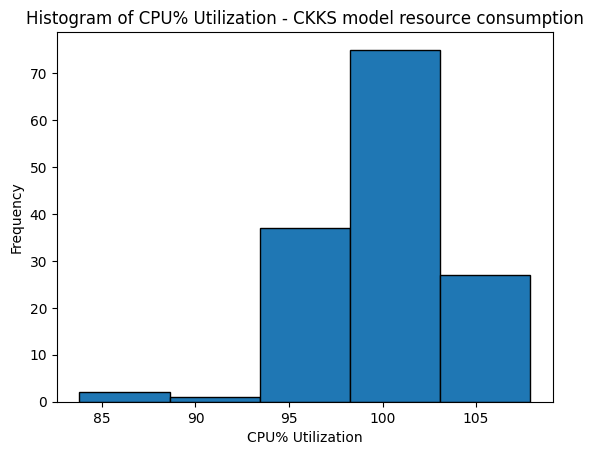

In [14]:
# Plot the histogram

filtered_ckks_cpu_util = [x for x in cpu_usages_ckks if x >= 70]

plt.hist(filtered_ckks_cpu_util, bins=5, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('Histogram of CPU% Utilization - CKKS model resource consumption')
plt.xlabel('CPU% Utilization')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [15]:
np.median(filtered_ckks_cpu_util)

100.2

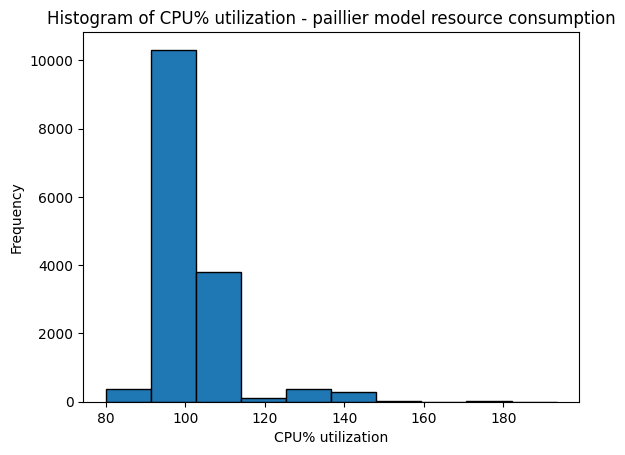

In [16]:
# Plot the histogram

filtered_paillier_cpu_util = [x for x in cpu_usages_paillier if x >= 80]

plt.hist(filtered_paillier_cpu_util, bins=10, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('Histogram of CPU% utilization - paillier model resource consumption')
plt.xlabel('CPU% utilization')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [17]:
print(np.mean(filtered_paillier_cpu_util))
print(np.median(filtered_paillier_cpu_util))

101.91484707577445
100.0


Text(0.5, 1.0, 'Line Graph of ram% util for ckks model')

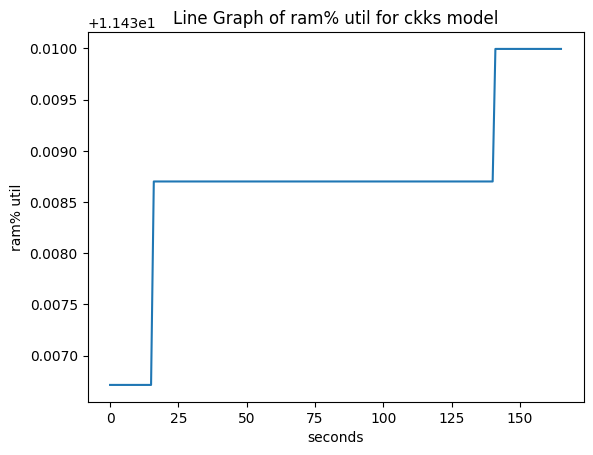

In [18]:
plt.plot(ram_usages_ckks)

# Add labels and title
plt.xlabel('seconds')
plt.ylabel('ram% util')
plt.title('Line Graph of ram% util for ckks model')

In [19]:
print(np.mean(ram_usages_ckks))
print(np.median(ram_usages_ckks))

11.438704588338744
11.43870114352701


Text(0.5, 1.0, 'Line Graph of ram% util for paillier model')

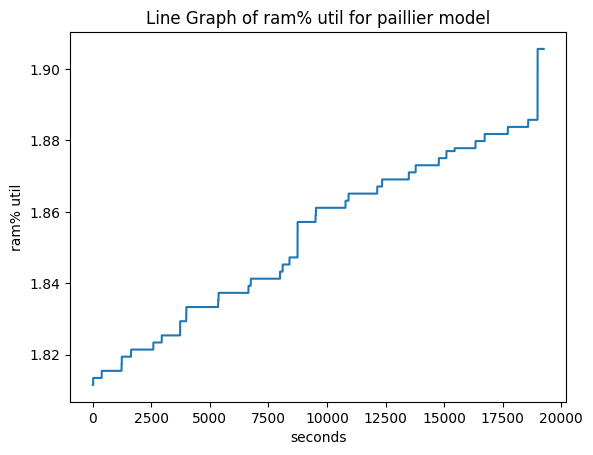

In [20]:
plt.plot(ram_usages_paillier)

# Add labels and title
plt.xlabel('seconds')
plt.ylabel('ram% util')
plt.title('Line Graph of ram% util for paillier model')

In [21]:
print(np.mean(ram_usages_paillier))
print(np.median(ram_usages_paillier))

1.8534660484633174
1.8611244456550036


In [22]:
np.mean(ram_usages_sklearn)

1.5960019442517417

In [23]:
train_time_ckks

156.2322235107422

In [24]:
train_time_paillier

20187.959385871887

In [25]:
testing_time_ckks

7.3622753620147705

In [26]:
testing_time_paillier

883.6606621742249

In [27]:
print(f"accuracy sklearn model: {accuracy_sklearn}")
print(f"accuracy ckks model: {accuracy_ckks}")
print(f"accuracy paillier model: {accuracy_paillier}")

accuracy sklearn model: 0.825925925925926
accuracy ckks model: 0.8296296296296296
accuracy paillier model: 0.8296296296296296


In [28]:
print(f"sklearn training time: {train_time_sklearn}")
print(f"sklearn testing time: {testing_time_sklearn}")
print(f"sklearn cpu usage: {cpu_usages_sklearn}")
print(f"sklearn ram usage: {ram_usages_sklearn}")

sklearn training time: 0.00691986083984375
sklearn testing time: 0.00039386749267578125
sklearn cpu usage: [2.0, 1.0, 0.0]
sklearn ram usage: [1.5960019442517415, 1.5960019442517415, 1.5960019442517415]
